In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Load the salary data
salary_data = pd.read_csv('Salary_data.csv')


In [3]:
salary_data.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [4]:
print(salary_data.info())
print(salary_data.describe())
print(salary_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None
              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max   

In [5]:
# Handle missing values by filling with the median
salary_data.fillna(salary_data.median(numeric_only=True), inplace=True)
print(salary_data.isnull().sum())

Age                    0
Gender                 2
Education Level        2
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64


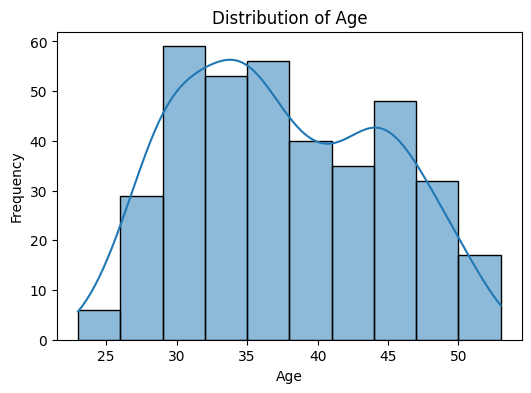

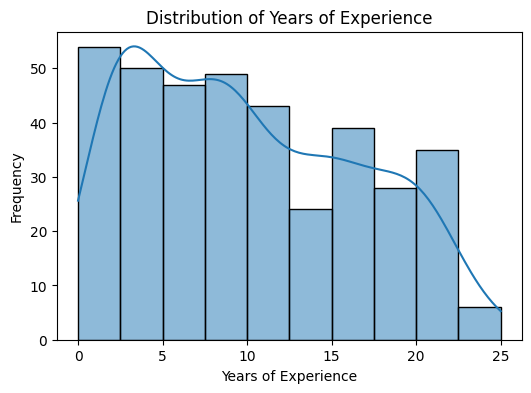

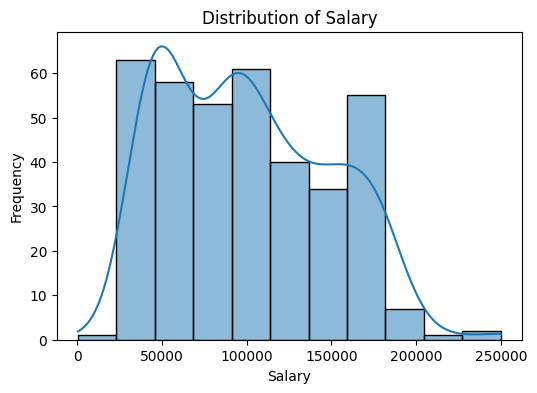

In [6]:
# Visualize distributions for numerical features
for column in ['Age', 'Years of Experience', 'Salary']:
    plt.figure(figsize=(6, 4))
    sns.histplot(salary_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Helps in understanding the spread and distribution of Years of Experience and Salary.

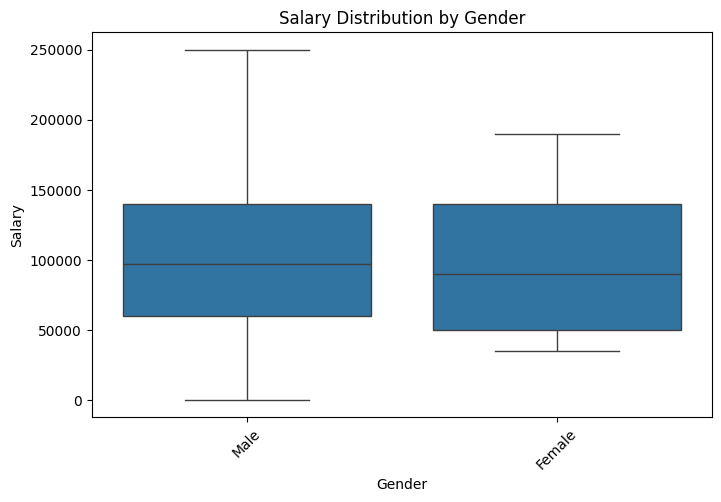

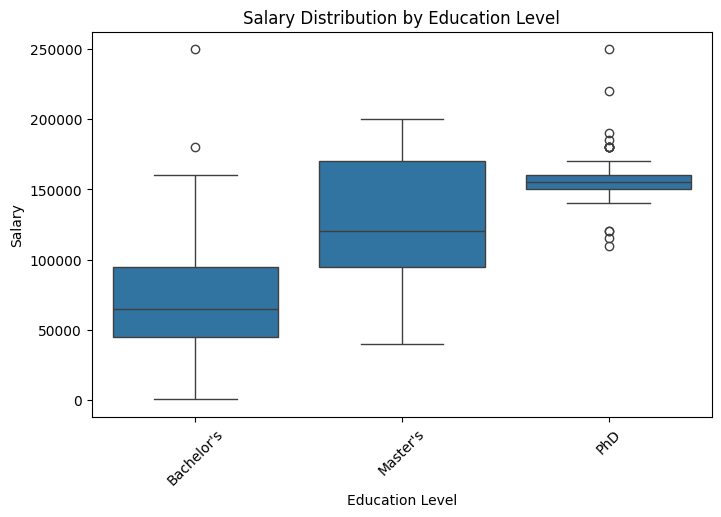

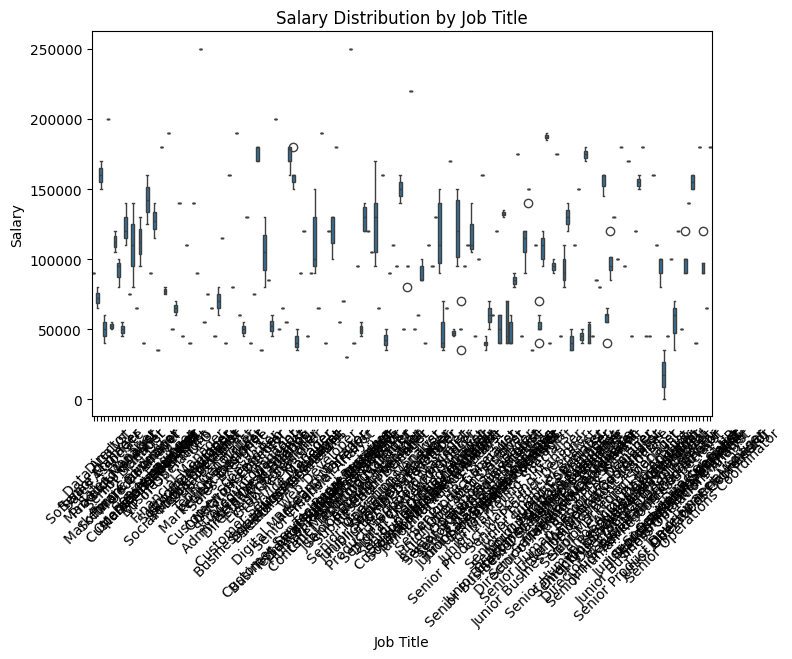

In [7]:
# Box plot for categorical variables vs salary
for column in ['Gender', 'Education Level', 'Job Title']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=salary_data[column], y=salary_data['Salary'])
    plt.title(f'Salary Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Salary')
    plt.xticks(rotation=45)
    plt.show()

This visualization helps to observe the salary trend across job titles and how Gender impacts salary, By observing these plots, we can detect outliers.

In [8]:
Q1 = salary_data[['Salary']].quantile(0.25)
Q3 = salary_data[['Salary']].quantile(0.75)
IQR = Q3 - Q1
salary_data = salary_data[~((salary_data[['Salary']] < (Q1 - 1.5 * IQR)) | (salary_data[['Salary']] > (Q3 + 1.5 * IQR))).any(axis=1)]

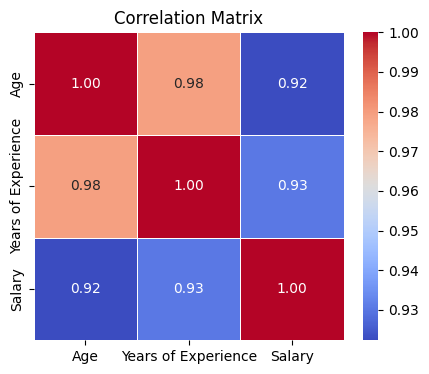

In [9]:
# Correlation heatmap
plt.figure(figsize=(5, 4))
numeric_data = salary_data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Encoding categorical columns
gender_encoder = LabelEncoder()
salary_data['Gender'] = gender_encoder.fit_transform(salary_data['Gender'])

education_encoder = LabelEncoder()
salary_data['Education Level'] = education_encoder.fit_transform(salary_data['Education Level'])

job_title_encoder = LabelEncoder()
salary_data['Job Title'] = job_title_encoder.fit_transform(salary_data['Job Title'])

print(salary_data.head())

    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0


In [11]:
# Split the data into features and target variable
X = salary_data[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = salary_data['Salary']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}\n")

Mean Absolute Error: 11026.42501874865
R^2 Score: 0.8894732564765409



A good model performance ensures that the predicted salaries are accurate.

In [16]:
# Coefficients of the Linear Regression model
coefficients = model.coef_
intercept = model.intercept_
feature_names = X_train.columns
print("Model Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {intercept:.4f}")

Model Coefficients:
Age: 3379.9362
Gender: 6545.4726
Education Level: 13714.8112
Job Title: 34.4590
Years of Experience: 2339.3025
Intercept: -63653.8955


In [17]:
# Answering the first question: Salary by Job Title and Experience
X_test['Predicted Salary'] = y_pred
X_test['Actual Salary'] = y_test

In [18]:
# Calculate mean salary by Job Title and Experience Level
mean_salaries_by_job_experience = X_test.groupby(['Job Title', 'Years of Experience'])[['Predicted Salary', 'Actual Salary']].mean()
mean_salaries_by_job_experience.sort_values(by='Predicted Salary', ascending=False, inplace=True)

In [19]:
# Display the mean salaries using pandas' display function
import pandas as pd
from IPython.display import display

# Display the DataFrame with the mean salaries
display(mean_salaries_by_job_experience)

,,Predicted Salary,Actual Salary
Job Title,Years of Experience,,
134,25.0,188917.661070,170000.0
30,21.0,186097.194954,180000.0
115,21.0,182266.333647,180000.0
24,20.0,176791.266306,180000.0
147,18.0,172971.176431,150000.0
...,...,...,...
70,2.0,41454.986259,40000.0
53,2.0,37274.847997,35000.0
10,2.0,36007.512807,40000.0


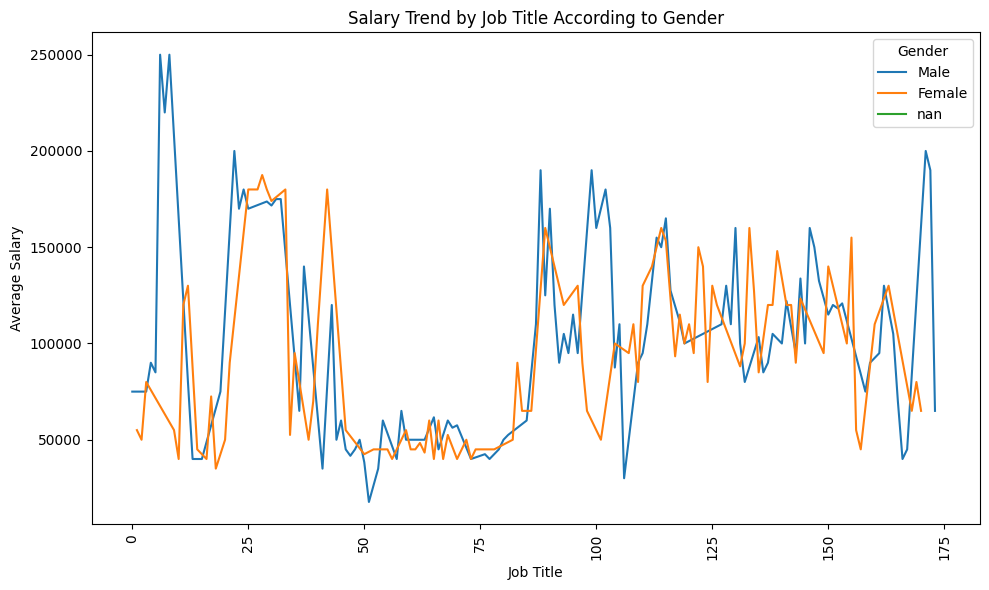

In [20]:
# Visualize the salary trend by Job Title and Gender
plt.figure(figsize=(10,6))
for gender in salary_data['Gender'].unique():
    gender_data = salary_data[salary_data['Gender'] == gender]
    mean_salary_by_job = gender_data.groupby('Job Title')['Salary'].mean()
    plt.plot(mean_salary_by_job.index, mean_salary_by_job.values, label=gender_encoder.inverse_transform([gender])[0])

plt.title('Salary Trend by Job Title According to Gender')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

By grouping by Job Title and Years of Experience, we can identify which job titles offer the highest salaries at different experience levels.

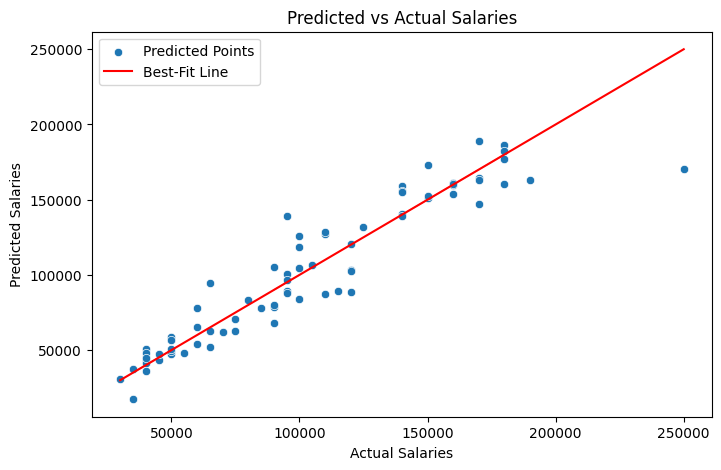

In [21]:
# Visualize Predicted salaries vs Actual Salaries
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, label="Predicted Points")
sns.lineplot(x=y_test, y=y_test, color="red", label="Best-Fit Line")
plt.title('Predicted vs Actual Salaries')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.legend()
plt.show()

In [22]:
import joblib

In [23]:
joblib.dump(model, 'salary_model.pkl')

print("Model saved as salary_model.pkl")

Model saved as salary_model.pkl


In [24]:
import os
print(os.getcwd())

/content
